In [1]:
import cv2
from matplotlib import pyplot as plt
import os
import time
import tensorflow as tf
import numpy as np
import uuid

In [5]:
IMAGES_PATH = os.path.join('c:/Users/vinay/OneDrive/Desktop/opencv/data/images')
number_images = 30

In [6]:
cap = cv2.VideoCapture(0)
for imgnum in range(number_images):
    print('Collecting image {}'.format(imgnum))
    ret, frame = cap.read()
    imgname = os.path.join(IMAGES_PATH,f'{str(uuid.uuid1())}.jpg')
    cv2.imwrite(imgname, frame)
    cv2.imshow('frame', frame)
    time.sleep(0.5)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [3]:
!labelme

2024-07-10 20:59:31,097 [INFO   ] __init__:get_config:67- Loading config file from: C:\Users\vinay\.labelmerc
qt.qpa.fonts: Unable to open default EUDC font: "EUDC.TTE"


In [4]:
import tensorflow as tf
import cv2
import json
import numpy as np
from matplotlib import pyplot as plt

In [7]:
gpus = tf.config.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

In [8]:
tf.test.is_gpu_available()

False

In [7]:
images = tf.data.Dataset.list_files('data\\images\\*.jpg',shuffle=False)

In [5]:
images.as_numpy_iterator().next()

b'data\\images\\1b464af1-3ea4-11ef-8ecd-a8934ac4266c.jpg'

In [9]:
def load_image(x):
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [12]:
images = images.map(load_image)

In [14]:
images.as_numpy_iterator().next()

array([[[143, 153, 126],
        [146, 156, 129],
        [148, 159, 129],
        ...,
        [133, 141, 130],
        [136, 142, 132],
        [138, 141, 132]],

       [[143, 153, 126],
        [146, 156, 129],
        [148, 159, 129],
        ...,
        [133, 141, 130],
        [138, 141, 132],
        [138, 141, 132]],

       [[145, 154, 125],
        [147, 156, 127],
        [147, 156, 127],
        ...,
        [131, 138, 130],
        [136, 139, 132],
        [137, 138, 132]],

       ...,

       [[123, 128, 105],
        [123, 127, 102],
        [125, 129, 104],
        ...,
        [ 94, 104,  93],
        [ 93, 104,  88],
        [ 92, 104,  84]],

       [[119, 127, 104],
        [119, 127, 103],
        [121, 127, 101],
        ...,
        [ 90, 102,  90],
        [ 89, 102,  85],
        [ 88, 101,  83]],

       [[118, 128, 104],
        [119, 129, 104],
        [120, 125, 102],
        ...,
        [ 87,  99,  87],
        [ 88, 100,  86],
        [ 87, 100,  83]]

In [15]:
image_generator = images.batch(4).as_numpy_iterator()

In [16]:
plot_images = image_generator.next()

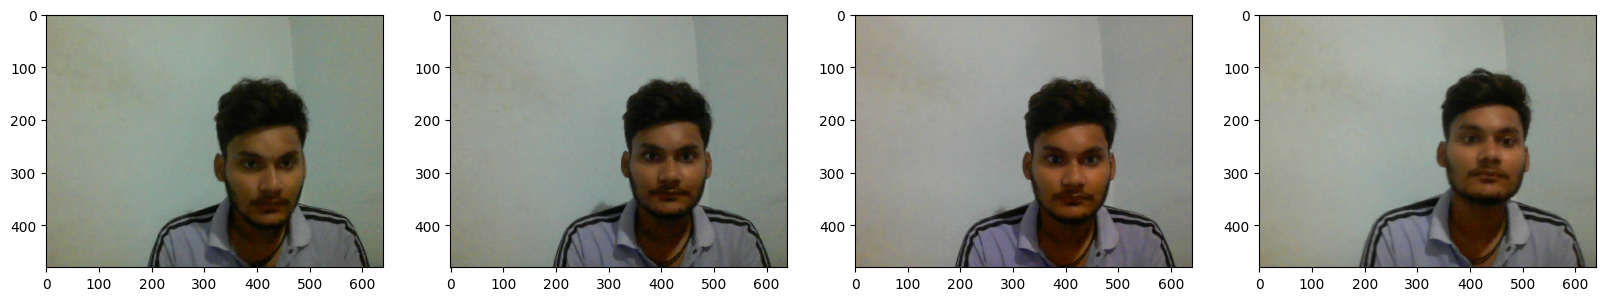

In [18]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image) 
plt.show()

In [4]:
for folder in ['train','test','val']:
    for file in os.listdir(os.path.join('data', folder, 'images')):
        
        filename = file.split('.')[0]+'.json'
        existing_filepath = os.path.join('data','labels', filename)
        if os.path.exists(existing_filepath): 
            new_filepath = os.path.join('data',folder,'labels',filename)
            os.replace(existing_filepath, new_filepath)      

In [4]:
import albumentations as alb
import json
augmentor = alb.Compose([alb.RandomCrop(width=450, height=450), 
                         alb.HorizontalFlip(p=0.5), 
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2), 
                         alb.RGBShift(p=0.2), 
                         alb.VerticalFlip(p=0.5)], 
                       bbox_params=alb.BboxParams(format='albumentations', 
                                                  label_fields=['class_labels']))

In [5]:
img = cv2.imread(os.path.join('data','train', 'images','1e7bb131-3ea4-11ef-8591-a8934ac4266c.jpg'))

In [6]:
with open(os.path.join('data', 'train', 'labels', '205c7a05-3ea4-11ef-b743-a8934ac4266c.json'), 'r') as f:
    label = json.load(f)

In [7]:
label['shapes'][0]['points']

[[301.94444444444446, 104.44444444444444], [491.38888888888886, 365.0]]

In [8]:
coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]

In [9]:
coords = list(np.divide(coords, [640,480,640,480]))

In [10]:
augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])


In [11]:
img

array([[[137, 149, 149],
        [137, 149, 149],
        [136, 148, 148],
        ...,
        [127, 142, 138],
        [122, 142, 137],
        [120, 143, 135]],

       [[137, 149, 149],
        [137, 149, 149],
        [137, 149, 149],
        ...,
        [127, 141, 139],
        [121, 141, 136],
        [119, 142, 134]],

       [[135, 149, 147],
        [137, 151, 149],
        [137, 150, 148],
        ...,
        [127, 140, 138],
        [122, 139, 135],
        [119, 139, 134]],

       ...,

       [[103, 122, 125],
        [103, 124, 125],
        [103, 124, 125],
        ...,
        [ 47,  52,  55],
        [ 43,  48,  51],
        [ 43,  48,  51]],

       [[103, 124, 125],
        [103, 125, 123],
        [103, 125, 123],
        ...,
        [ 40,  51,  55],
        [ 38,  50,  54],
        [ 36,  51,  54]],

       [[103, 125, 123],
        [103, 125, 123],
        [101, 126, 122],
        ...,
        [ 39,  51,  55],
        [ 33,  49,  55],
        [ 29,  48,  53]]

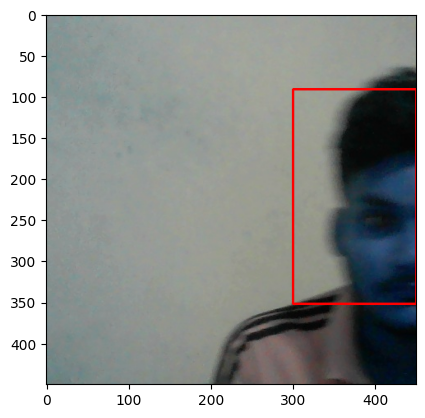

In [12]:
cv2.rectangle(augmented['image'], 
              tuple(np.multiply(augmented['bboxes'][0][:2], [450,450]).astype(int)),
              tuple(np.multiply(augmented['bboxes'][0][2:], [450,450]).astype(int)), 
                    (255,0,0), 2)

plt.imshow(augmented['image'])

In [13]:
for partition in ['train','test','val']: 
    for image in os.listdir(os.path.join('data', partition, 'images')):
        img = cv2.imread(os.path.join('data', partition, 'images', image))

        coords = [0,0,0.00001,0.00001]
        label_path = os.path.join('data', partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            coords = list(np.divide(coords, [640,480,640,480]))

        try: 
            for x in range(60):
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                cv2.imwrite(os.path.join('aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0: 
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0 
                    else: 
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else: 
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0 


                with open(os.path.join('aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)

C:\Users\vinay\AppData\Roaming\Python\Python311\site-packages\albumentations\core\bbox_utils.py:469: RuntimeWarning: invalid value encountered in divide
  & (clipped_box_areas / denormalized_box_areas >= min_visibility - epsilon)


In [10]:
import tensorflow as tf
train_images = tf.data.Dataset.list_files('aug_data\\train\\images\\*.jpg', shuffle=False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (120,120)))
train_images = train_images.map(lambda x: x/255)

In [11]:
test_images = tf.data.Dataset.list_files('aug_data\\test\\images\\*.jpg', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (120,120)))
test_images = test_images.map(lambda x: x/255)

In [12]:
val_images = tf.data.Dataset.list_files('aug_data\\val\\images\\*.jpg', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (120,120)))
val_images = val_images.map(lambda x: x/255)

In [13]:
train_images.as_numpy_iterator().next()

array([[[0.3377451 , 0.35582107, 0.27904412],
        [0.3418505 , 0.3653799 , 0.25557598],
        [0.33743873, 0.35735294, 0.2675245 ],
        ...,
        [0.20392157, 0.22205882, 0.23382352],
        [0.2223652 , 0.24295343, 0.23756127],
        [0.22794117, 0.24571079, 0.23278186]],

       [[0.35245097, 0.36568627, 0.28039217],
        [0.3529412 , 0.36770833, 0.26397058],
        [0.35      , 0.36519608, 0.27218136],
        ...,
        [0.21133578, 0.21476716, 0.2226103 ],
        [0.22738971, 0.22824755, 0.22095588],
        [0.2408701 , 0.24332108, 0.24822304]],

       [[0.35343137, 0.3612745 , 0.27518383],
        [0.35594362, 0.36378676, 0.28094363],
        [0.3603554 , 0.37169117, 0.26623774],
        ...,
        [0.21611519, 0.21611519, 0.21611519],
        [0.23088235, 0.23088235, 0.2240196 ],
        [0.24001226, 0.24503677, 0.24865197]],

       ...,

       [[0.4261642 , 0.4392157 , 0.37156862],
        [0.4201593 , 0.43976715, 0.35300246],
        [0.41231617, 0

In [14]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
        label = json.load(f)
        
    return [label['class']], label['bbox']

In [15]:
train_labels = tf.data.Dataset.list_files('aug_data\\train\\labels\\*.json', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [16]:
test_labels = tf.data.Dataset.list_files('aug_data\\test\\labels\\*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [17]:
val_labels = tf.data.Dataset.list_files('aug_data\\val\\labels\\*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [18]:
train_labels.as_numpy_iterator().next()

(array([1], dtype=uint8),
 array([0.5757, 0.1862, 1.    , 0.7603], dtype=float16))

In [19]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)

(3480, 3480, 960, 960, 960, 960)

In [20]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(5000)
train = train.batch(8)
train = train.prefetch(4)

In [21]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(1300)
test = test.batch(8)
test = test.prefetch(4)

In [22]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(1000)
val = val.batch(8)
val = val.prefetch(4)

In [23]:
train.as_numpy_iterator().next()[1]

(array([[0],
        [0],
        [1],
        [1],
        [0],
        [0],
        [1],
        [0]], dtype=uint8),
 array([[0.    , 0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    , 0.    ],
        [0.5474, 0.2299, 1.    , 0.646 ],
        [0.7915, 0.0637, 1.    , 0.713 ],
        [0.    , 0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    , 0.    ],
        [0.1675, 0.259 , 0.6157, 0.779 ],
        [0.    , 0.    , 0.    , 0.    ]], dtype=float16))

In [24]:
data_samples = train.as_numpy_iterator()

In [25]:
res = data_samples.next()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


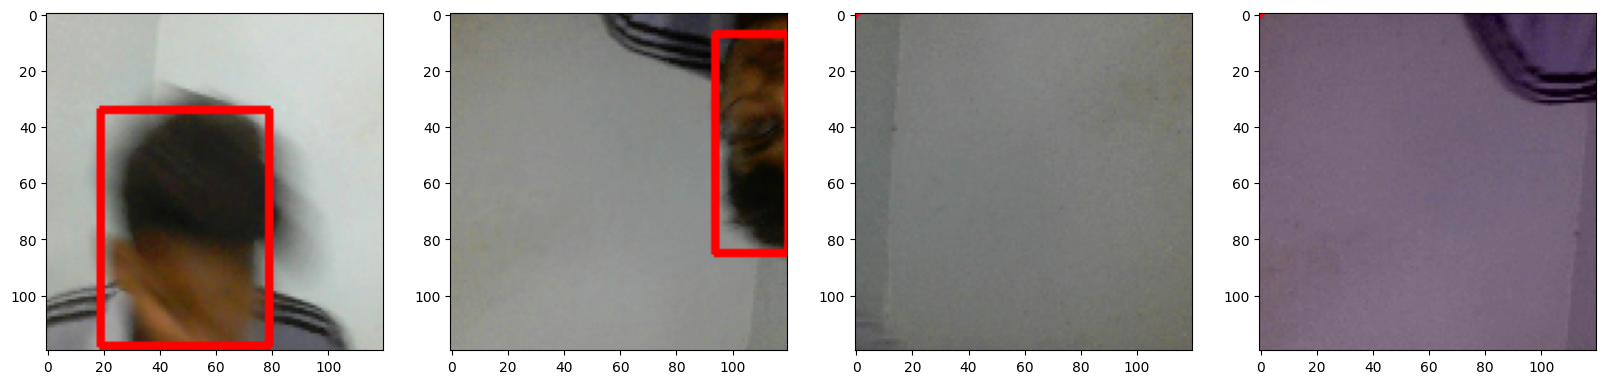

In [26]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))

for idx in range(4): 
    sample_image = np.copy(res[0][idx])  # Make a writable copy of the image
    sample_coords = res[1][1][idx]
    
    cv2.rectangle(sample_image, 
                  tuple(np.multiply(sample_coords[:2], [120, 120]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [120, 120]).astype(int)), 
                  (255, 0, 0), 2)
    
    ax[idx].imshow(sample_image)

In [27]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

In [28]:
vgg = VGG16(include_top=False)


In [29]:
def build_model(): 
    input_layer = Input(shape=(120,120,3))
    
    vgg = VGG16(include_top=False)(input_layer)

    # Classification Model  
    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation='relu')(f1)
    class2 = Dense(1, activation='sigmoid')(class1)
    
    # Bounding box model
    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048, activation='relu')(f2)
    regress2 = Dense(4, activation='sigmoid')(regress1)
    
    facetracker = Model(inputs=input_layer, outputs=[class2, regress2])
    return facetracker

In [30]:
facetracker = build_model()

In [31]:
facetracker.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)    │ (None, 120, 120, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ vgg16 (Functional)            │ (None, 3, 3, 512)         │      14,714,688 │ input_layer_1[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ global_max_pooling2d          │ (None, 512)               │               0 │ vgg16[0][0]                │
│ (GlobalMaxPooling2D)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ global_max_pooling2d_1        │ (None, 512)               │               0 │ vgg16[0][0]                │
│ (GlobalMaxPooling2D)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense (Dense)                 │ (None, 2048)              │       1,050,624 │ global_max_pooling2d[0][0] │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_2 (Dense)               │ (None, 2048)              │       1,050,624 │ global_max_pooling2d_1[0]… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_1 (Dense)               │ (None, 1)                 │           2,049 │ dense[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_3 (Dense)               │ (None, 4)                 │           8,196 │ dense_2[0][0]              │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 16,826,181 (64.19 MB)

 Trainable params: 16,826,181 (64.19 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
X, y = train.as_numpy_iterator().next()

In [33]:
classes, coords = facetracker.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [34]:
batches_per_epoch = len(train)
lr_decay = (1./0.75 -1)/batches_per_epoch

In [35]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001, decay=lr_decay)

C:\Users\vinay\AppData\Roaming\Python\Python311\site-packages\keras\src\optimizers\base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [36]:
def localization_loss(y_true, yhat):            
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))
                  
    h_true = y_true[:,3] - y_true[:,1] 
    w_true = y_true[:,2] - y_true[:,0] 

    h_pred = yhat[:,3] - yhat[:,1] 
    w_pred = yhat[:,2] - yhat[:,0] 
    
    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))
    
    return delta_coord + delta_size

In [37]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

In [38]:
localization_loss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=6.707618>

In [39]:
classloss(y[0], classes)

<tf.Tensor: shape=(), dtype=float32, numpy=0.59459865>

In [40]:
regressloss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=6.707618>

In [48]:
class FaceTracker(Model): 
    def __init__(self, eyetracker, **kwargs):
        super().__init__(**kwargs)
        self.model = eyetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt
    
    def train_step(self, batch, **kwargs): 
     X, y = batch

    # Reshape y[0] for loss calculation, without modifying the tuple
     y0_reshaped = tf.reshape(y[0], (-1, 1))

    # Reshape classes for loss calculation
     with tf.GradientTape() as tape:  # Initialize GradientTape
        classes, coords = self.model(X, training=True)
        classes_reshaped = tf.reshape(classes, (-1, 1))

        # Calculate losses using the reshaped tensors
        batch_classloss = self.closs(y0_reshaped, classes_reshaped)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)

        # Combine total loss
        total_loss = batch_localizationloss + 0.5 * batch_classloss

    # Compute gradients
     grad = tape.gradient(total_loss, self.model.trainable_variables)

    # Apply gradients
     self.opt.apply_gradients(zip(grad, self.model.trainable_variables))

     return {"total_loss": total_loss, "class_loss": batch_classloss, "regress_loss": batch_localizationloss}
    
    def test_step(self, batch, **kwargs): 
     X, y = batch

    # Reshape y[0] for loss calculation, without modifying the tuple
     y0_reshaped = tf.reshape(y[0], (-1, 1))

    # Perform inference (no training)
     classes, coords = self.model(X, training=False)

    # Reshape the predicted classes
     classes_reshaped = tf.reshape(classes, (-1, 1))

    # Calculate losses using the reshaped tensors
     batch_classloss = self.closs(y0_reshaped, classes_reshaped)
     batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)

    # Combine total loss
     total_loss = batch_localizationloss + 0.5 * batch_classloss

     return {"total_loss": total_loss, "class_loss": batch_classloss, "regress_loss": batch_localizationloss}

    

In [49]:
model = FaceTracker(facetracker)


In [50]:
model.compile(opt, classloss, regressloss)

In [51]:
logdir='logs'

In [52]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [53]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
435/435 ━━━━━━━━━━━━━━━━━━━━ 1242s 3s/step - class_loss: 0.1275 - regress_loss: 0.3620 - total_loss: 0.4257 - val_class_loss: 0.0010 - val_regress_loss: 0.0524 - val_total_loss: 0.0529
Epoch 2/10
435/435 ━━━━━━━━━━━━━━━━━━━━ 910s 2s/step - class_loss: 0.0453 - regress_loss: 0.1410 - total_loss: 0.1637 - val_class_loss: 0.0018 - val_regress_loss: 0.0511 - val_total_loss: 0.0520
Epoch 3/10
435/435 ━━━━━━━━━━━━━━━━━━━━ 932s 2s/step - class_loss: 0.0450 - regress_loss: 0.1199 - total_loss: 0.1424 - val_class_loss: 0.0061 - val_regress_loss: 0.0299 - val_total_loss: 0.0329
Epoch 4/10
435/435 ━━━━━━━━━━━━━━━━━━━━ 987s 2s/step - class_loss: 0.0066 - regress_loss: 0.0370 - total_loss: 0.0402 - val_class_loss: 2.0312e-04 - val_regress_loss: 0.0127 - val_total_loss: 0.0128
Epoch 5/10
435/435 ━━━━━━━━━━━━━━━━━━━━ 634s 1s/step - class_loss: 0.0089 - regress_loss: 0.0271 - total_loss: 0.0316 - val_class_loss: 0.0016 - val_regress_loss: 0.0102 - val_total_loss: 0.0110
Epoch 6/10
435/435 ━

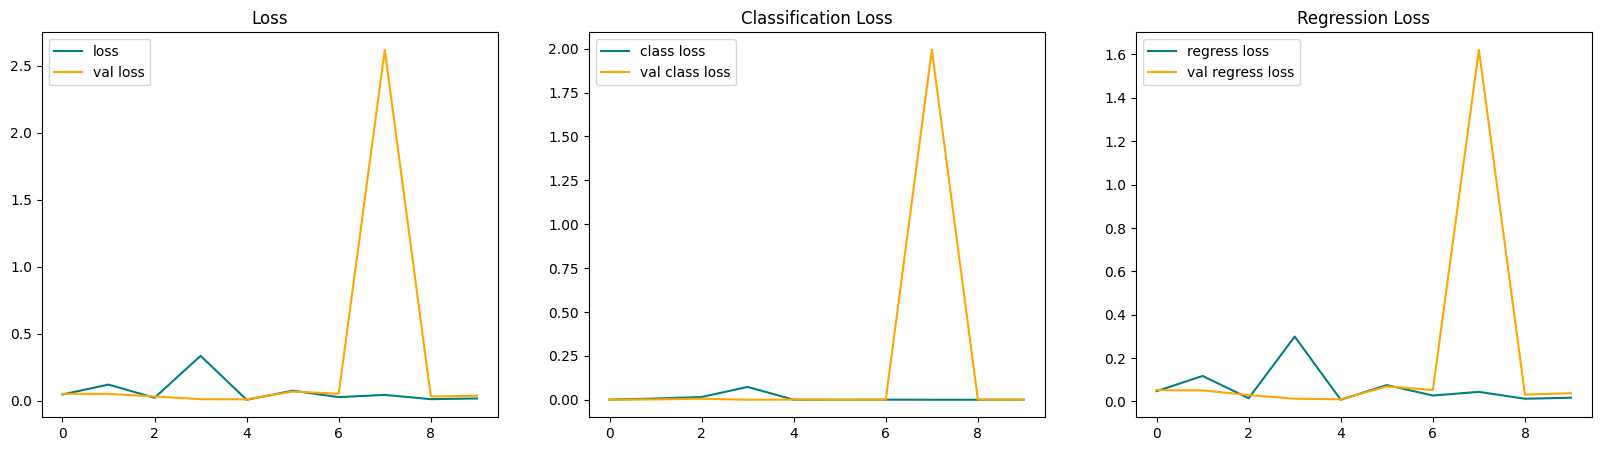

In [54]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['class_loss'], color='teal', label='class loss')
ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(hist.history['regress_loss'], color='teal', label='regress loss')
ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show()

In [55]:
test_data = test.as_numpy_iterator()

In [56]:
test_sample = test_data.next()

In [57]:
yhat = facetracker.predict(test_sample[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 721ms/step


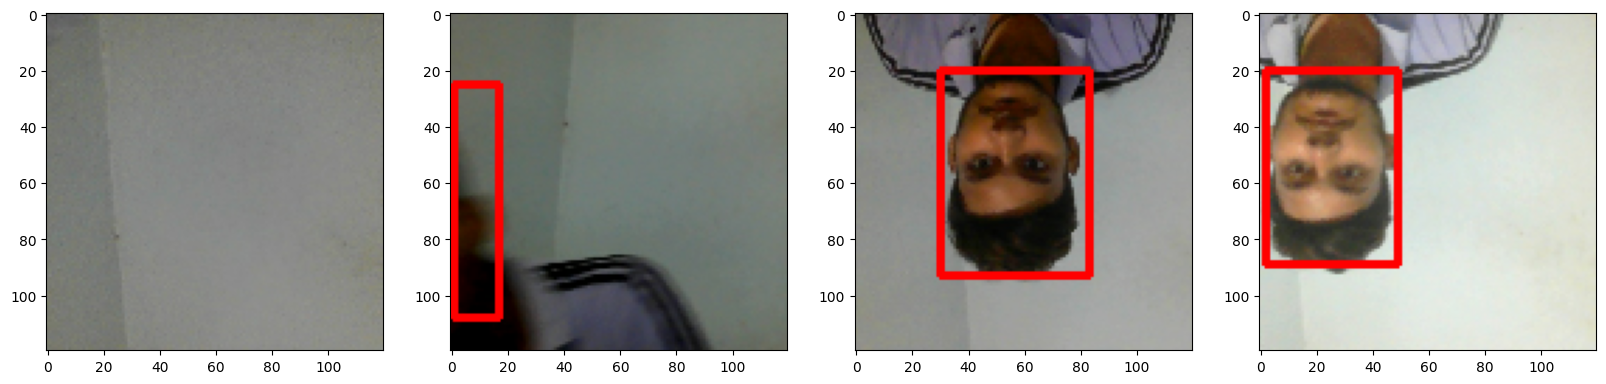

In [62]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = np.copy(test_sample[0][idx])
    sample_coords = yhat[1][idx]
    
    if yhat[0][idx] > 0.9:
        cv2.rectangle(sample_image, 
                      tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                            (255,0,0), 2)
    
    ax[idx].imshow(sample_image)

In [2]:
from tensorflow.keras.models import load_model

In [60]:
facetracker.save('facetracker.h5')

In [3]:
facetracker = load_model('facetracker.h5')

In [5]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    _ , frame = cap.read()
    frame = frame[50:500, 50:500,:]
    
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = tf.image.resize(rgb, (120,120))
    
    yhat = facetracker.predict(np.expand_dims(resized/255,0))
    sample_coords = yhat[1][0]
    
    if yhat[0] > 0.5: 
        # Controls the main rectangle
        cv2.rectangle(frame, 
                      tuple(np.multiply(sample_coords[:2], [450,450]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [450,450]).astype(int)), 
                            (255,0,0), 2)
        # Controls the label rectangle
        cv2.rectangle(frame, 
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int), 
                                    [0,-30])),
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                    [80,0])), 
                            (255,0,0), -1)
        
        # Controls the text rendered
        cv2.putText(frame, 'face', tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                               [0,-5])),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    
    cv2.imshow('EyeTrack', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━

In [ ]:
import tensorflow as tf